# Biomechanical Features of Orthopedic Patients

This project explores the features of biomechanical measurements of orthopedic patients with resulting lumbar functional diagnoses of normal & abnormal and in need of treatment.  

Spondylolysis is a crack or fracture in the small, thin portion of the vertebra, in some cases this weakens the bones so much it is unable to maintain proper positioning resulting in Spondylolisthesis. Proper diagnosis and treatment is necessary to address pain and prevent nerve damage.  

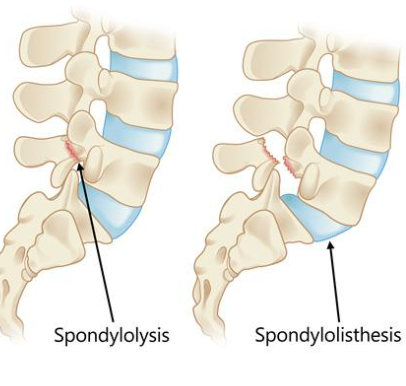

In [1]:
from IPython.display import Image
Image(filename='spine.png')

 Spondylolisthesis can be classified as low grade or high grade as measured by the amount of slippage.  A high-grade slip occurs when more then 50 percent of the width of the fractured vertebra slips forward on the vertebra below it.

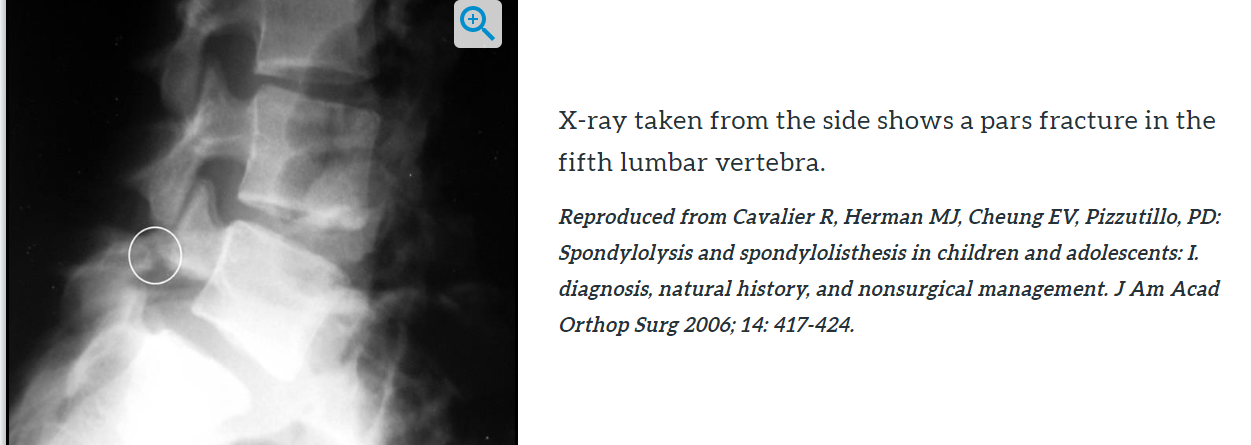

In [2]:
Image(filename='xray1.png')

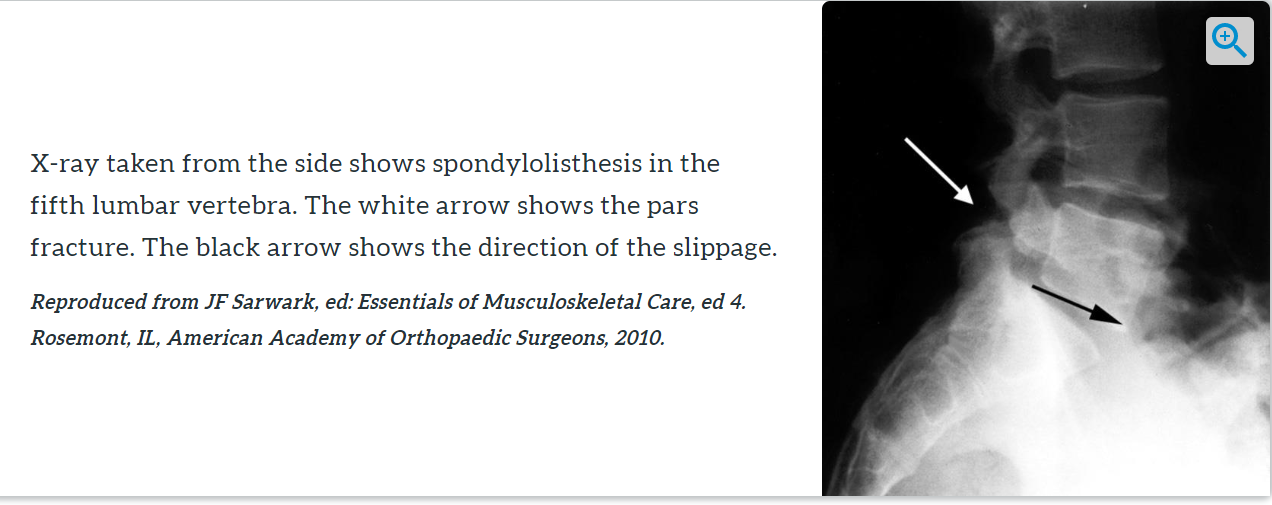

In [3]:
Image(filename='xray2.png')

As you can see from the xrays above, diagnosis is dependent on visual images that are not always clear and detailed.  Technology can be used to measure angles and assist with proper diagnosis early, preventing potential nerve damage in spondylolesthesis.  This project attempts to assist with early diagnosis of patients experiencing syptoms that may be unperceptable by the human eye with low imaging qulity preventing more damage to the patients vertebra by sending them home only to wait for a worsening disease state.

To perform the predictions this data includes the degree of spondylolisthesis and 5 features including pelvic angles and lumbar angles that can be used to create a predictive model based on multi-variables.  Perhaps, in the future, this model could be used to measure young adults prior to disease states and prescribe preventative steps for those with pelvic measurements outside of normal range.  For instance, a child born with an abnormal pelvic tilt may want to build quadraceps and take extra steps to protect their lumbar back, possibly preventing the indicated high-risk for lumbar fractures.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Description

Data for this project includes 2 CSV files from Kaggle.com. 

-weka2c.csv  includes 310 patients with 6 biomechanical measurements and a nominal classification column of normal/abnormal.

-weka3c.csv  includes the same 310 patients, biomechanical measurements, and a diagnosis classification including: Disc Hernia, Spondylolisthesis, and Normal.

In [5]:
data = pd.read_csv('weka2c.csv')
o_data = pd.read_csv('weka3c.csv')
plt.style.use('ggplot')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [6]:
o_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [8]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


To determine outliers, chart below is classification of Grade of Spondylolethesis based on degrees.
Grade I: 0-25%.
Grade II: 26-50%.
Grade III: 51-75%.
Grade IV: 76-100%.
Grade V (spondyloptosis): >100%

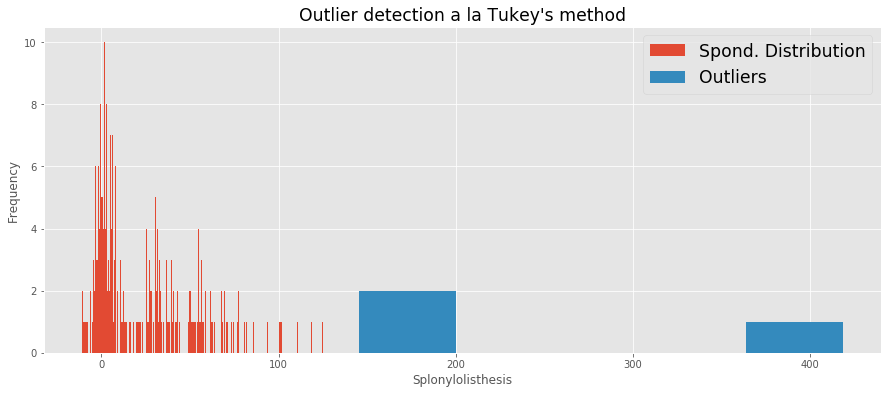

In [21]:
# Detect outliers on degree_spondylolisthesis dataset
# Funciton for detecting ouliers a la Turkey's method using z-score

def tukey_outliers(data) -> list:
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    outliers = []
    for i in data:
        z_score = (i - mean) / std
        if abs(z_score) > threshold:
            outliers.append(i)
    return outliers
spond_outliers = tukey_outliers(data['degree_spondylolisthesis'])

plt.figure(figsize=(15,6))
data['degree_spondylolisthesis'].plot(kind='hist', bins=1000, label='Spond. Distribution')
plt.hist(spond_outliers, bins = 5, label='Outliers')
plt.title("Outlier detection a la Tukey's method", fontsize='xx-large')
plt.xlabel('Splonylolisthesis')
plt.legend(fontsize='xx-large')

3 appear to be outliers, One >400degrees clearly confirmed outlier, 2 >100 but <200 I will not remove based on data is gathered from mostly patients with abnormalities and degree is still <360 and within a possible range.

Here we split the data and plot to see the grouping of normal vs abnormal
Interesting points, the sacral slope, when abnormal tends toward a specific value, 

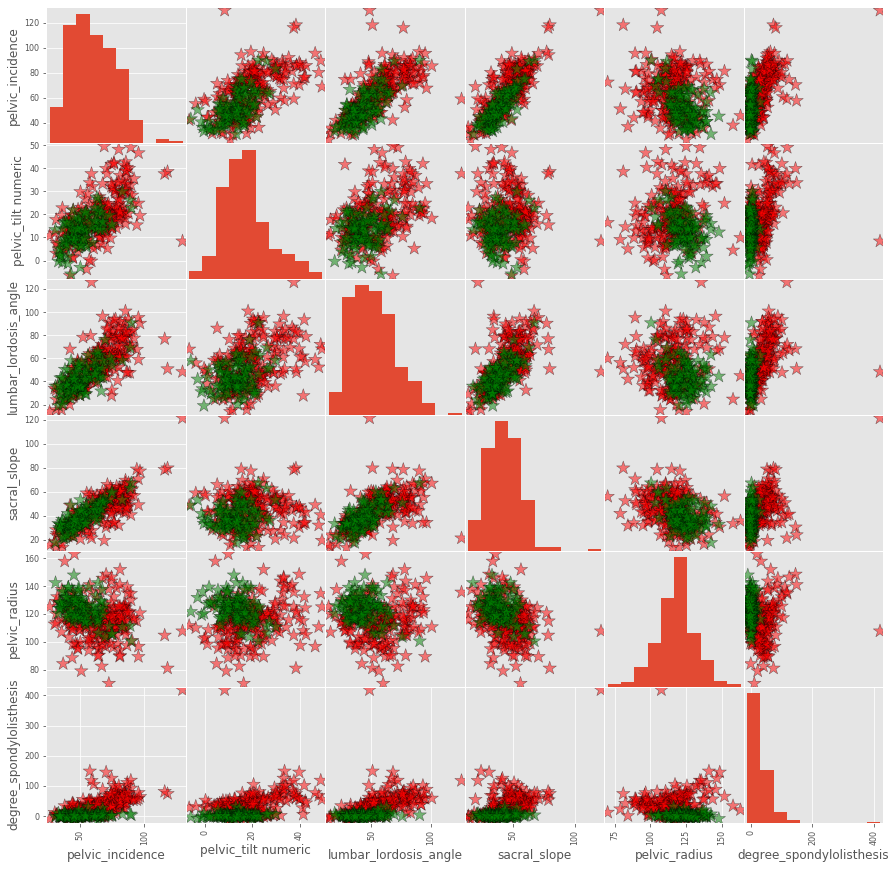

In [24]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

Determine # of Abnormal vs Normal values, from the previous graph we are counting the 'red' data points and 'green' data points.

Abnormal    210
Normal      100
Name: class, dtype: int64

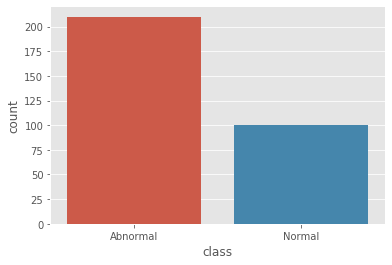

In [22]:
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()

Fit and predict data utlizing scikit-learn libraries K-Nearest Neighbors algorithm.  This algorithm generates training data by describing and storing features as their vectors in space (multidimensions, not 2D arrays) and classifying each by proximity to all other vectors (grouping into a class by location).

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

Determine the accuracy on KNN prediction

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.8602150537634409
